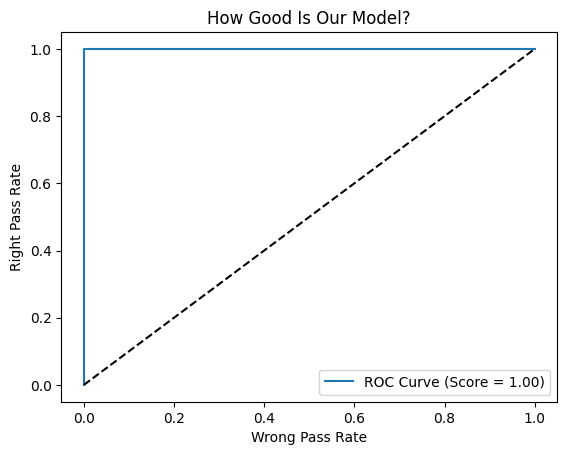

Score: 1.0


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Data
hours = np.array([[1], [8], [3], [10], [5], [6], [7], [2], [9], [4]])
real = [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
model = LogisticRegression()
model.fit(hours, real)
chances = model.predict_proba(hours)[:, 1]  # Chances of Pass

# Make the curve
false_rate, true_rate, _ = roc_curve(real, chances)
area = auc(false_rate, true_rate)

# Draw it
plt.plot(false_rate, true_rate, label=f"ROC Curve (Score = {area:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel("Wrong Pass Rate")
plt.ylabel("Right Pass Rate")
plt.title("How Good Is Our Model?")
plt.legend()
plt.show()
print("Score:", area)

In [5]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

# Our data
hours = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9], [10]])
real = [0, 0, 0, 1, 1, 1, 1, 1, 1, 1]

# Teach the model
model = LogisticRegression()
model.fit(hours, real)

# Make guesses
guesses = model.predict(hours)
chances = model.predict_proba(hours)[:, 1]

# Check how good it is
print("Confusion Table:\n", confusion_matrix(real, guesses))
print("Precision (Pass accuracy):", precision_score(real, guesses))
print("Recall (Caught all Passes):", recall_score(real, guesses))
print("F1 Score (Mix of both):", f1_score(real, guesses))
print("ROC Score (Overall goodness):", roc_auc_score(real, chances))

# Guess for new students
new_hours = np.array([[1.5], [5.5]])
new_guesses = model.predict(new_hours)
print("Guesses for 1.5 and 5.5 hours:", ["Fail" if g == 0 else "Pass" for g in new_guesses])


Confusion Table:
 [[3 0]
 [0 7]]
Precision (Pass accuracy): 1.0
Recall (Caught all Passes): 1.0
F1 Score (Mix of both): 1.0
ROC Score (Overall goodness): 1.0
Guesses for 1.5 and 5.5 hours: ['Fail', 'Pass']
